# Transformers

In [1]:
import os
import sys

os.chdir("..")
sys.path.append(os.getcwd())
os.getcwd()

'/group/pmc026/nchoong/QuantumTransformer'

In [2]:
from transformer.pytorch.main_no_embed import main
from transformer.pytorch.utils.plots import plot_metrics

2024-09-24 04:07:44.038522: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-24 04:07:44.050727: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-24 04:07:44.065995: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-24 04:07:44.070667: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-24 04:07:44.082089: I tensorflow/core/platform/cpu_feature_guar

In [3]:
from config import dev

dev

device(type='cuda')

In [4]:
import random
import numpy as np
import torch
import tensorflow as tf

In [5]:
seed = 42

os.environ["PYTHONHASHSEED"] = str(seed)
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
os.environ["TF_DETERMINISTIC_OPS"] = "1"
os.environ["TF_CUDNN_DETERMINISTIC"] = "1"
tf.config.threading.set_inter_op_parallelism_threads(1)
tf.config.threading.set_intra_op_parallelism_threads(1)

os.environ["OMP_NUM_THREADS"] = str(os.cpu_count())
os.environ["TF_NUM_INTEROP_THREADS"] = str(os.cpu_count())
os.environ["TF_NUM_INTRAOP_THREADS"] = str(os.cpu_count())

tf.config.threading.set_intra_op_parallelism_threads(os.cpu_count())
tf.config.threading.set_inter_op_parallelism_threads(os.cpu_count())

torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

## Classical

In [6]:
train_loss, train_acc, val_loss, val_acc, train_auc, val_auc, best_dict = main(
    n_epochs=30,
    sample_size=0,
    batch_size=64,
    embed_dim=8,
    num_heads=2,
    num_blocks=2,
    tqdm_disabled=False,
    batch=True,
)

classiscal_metrics = {
    "train_loss": train_loss,
    "train_acc": train_acc,
    "val_loss": val_loss,
    "val_acc": val_acc,
    "train_auc": train_auc,
    "val_auc": val_auc,
    "best_dict": best_dict,
}

train_data:  20000
pos:  10006
neg:  9994
pos:  2494
neg:  2506
pos:  12500
neg:  12500
++ There will be 2 transformer blocks
The model has 7,297 trainable parameters


Epoch  30/30: 100%|██████████| 313/313 [00:06<00:00, 48.41batch/s, Epoch = 0m 6s, Loss = 0.3187|0.3352, Acc = 0.866|0.852, AUC = 93.799|93.206]

TOTAL TIME = 212.59s
BEST ACC = 0.85% AT EPOCH 9
BEST AUC = 93.21 AT EPOCH 12


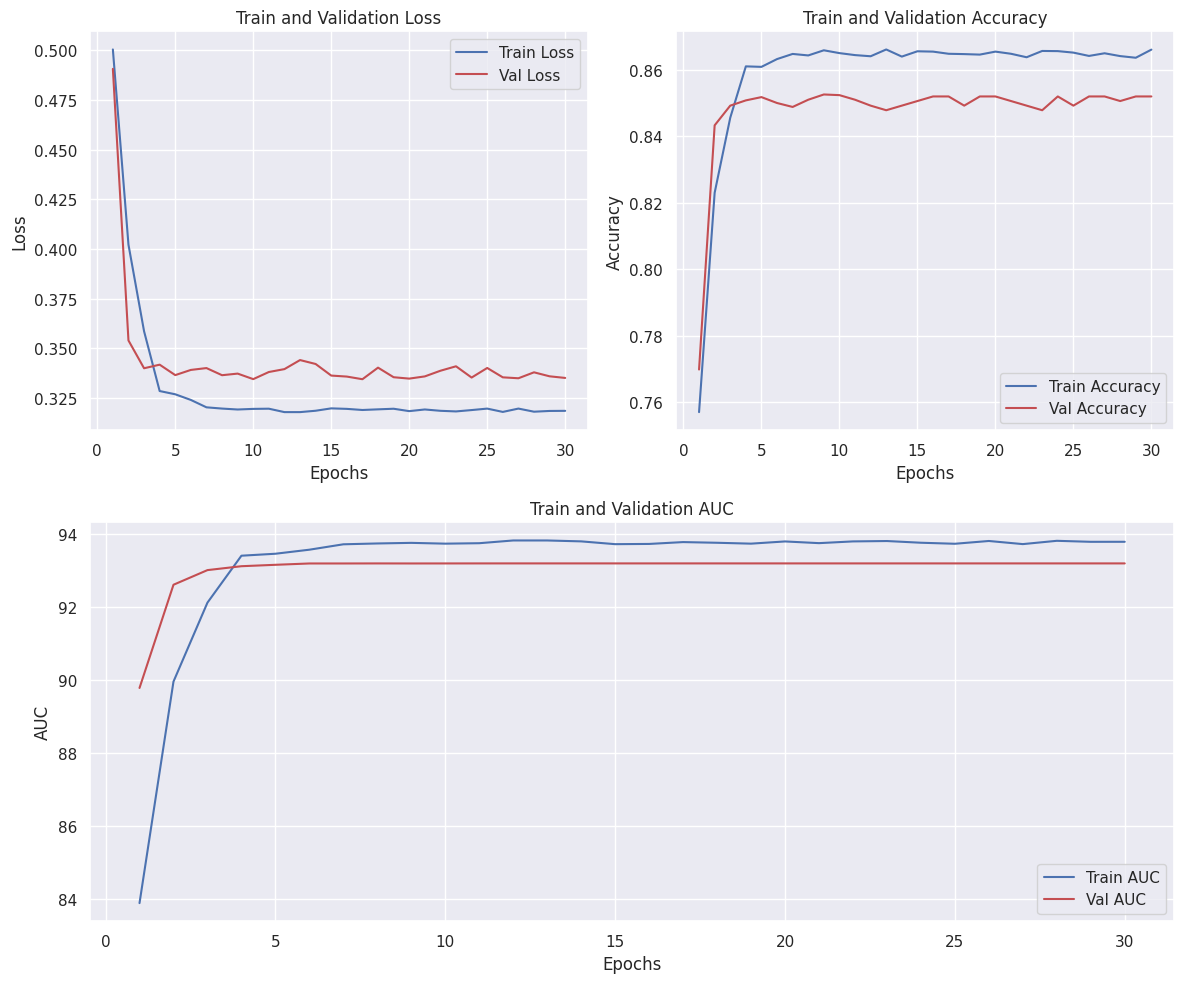

In [7]:
plot_metrics(train_loss, val_loss, train_acc, val_acc, train_auc, val_auc)

## Quantum with Pennylane GPU

In [8]:
train_loss, train_acc, val_loss, val_acc, train_auc, val_auc, best_dict = main(
    n_epochs=30,
    sample_size=0,
    batch_size=64,
    embed_dim=8,
    num_heads=2,
    num_blocks=2,
    n_qubits_transformer=8,
    n_qubits_ffn=8,
    n_qlayers=3,
    tqdm_disabled=False,
    q_device="default.qubit.torch",
    batch=True,
    circuit_type="pennylane",
)

quantum_pl_gpu_metrics_batch = {
    "train_loss": train_loss,
    "train_acc": train_acc,
    "val_loss": val_loss,
    "val_acc": val_acc,
    "train_auc": train_auc,
    "val_auc": val_auc,
    "best_dict": best_dict,
}

/group/pmc026/nchoong/qt/lib/python3.11/site-packages/pennylane/devices/default_qubit_torch.py:173: PennyLaneDeprecationWarning: Use of 'default.qubit.torch' is deprecated. Instead, use 'default.qubit', which supports backpropagation. If you experience issues, reach out to the PennyLane team on the discussion forum: https://discuss.pennylane.ai/
  warnings.warn(
/group/pmc026/nchoong/qt/lib/python3.11/site-packages/pennylane/devices/default_qubit_legacy.py:211: PennyLaneDeprecationWarning: Use of 'default.qubit.torch' is deprecated. Instead, use 'default.qubit', which supports backpropagation. If you experience issues, reach out to the PennyLane team on the discussion forum: https://discuss.pennylane.ai/
  warnings.warn(


train_data:  20000
pos:  10006
neg:  9994
pos:  2494
neg:  2506
pos:  12500
neg:  12500
++ There will be 2 transformer blocks
++ Transformer will use 8 qubits and 3 q layers
The feed-forward head will use 8 qubits
Using PennyLane quantum device default.qubit.torch
weight_shapes = (n_qlayers, n_qubits) = (3, 8)
The model has 6,753 trainable parameters


Epoch  30/30: 100%|██████████| 313/313 [07:06<00:00,  1.36s/batch, Epoch = 7m 6s, Loss = 0.3880|0.3838, Acc = 0.829|0.828, AUC = 90.752|90.761]

TOTAL TIME = 12926.11s
BEST ACC = 0.83% AT EPOCH 13
BEST AUC = 90.76 AT EPOCH 18


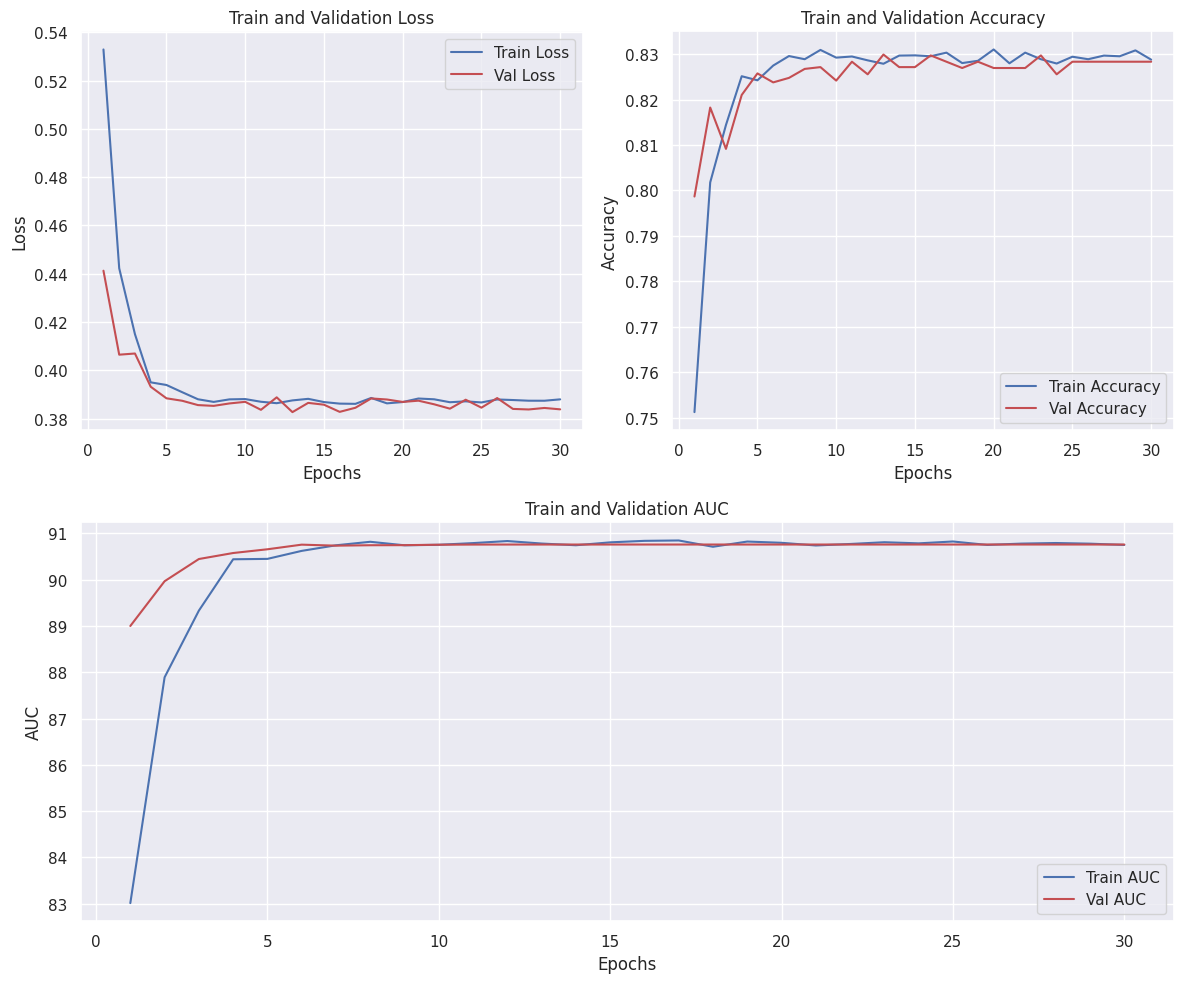

In [9]:
plot_metrics(train_loss, val_loss, train_acc, val_acc, train_auc, val_auc)

## Quantum with Tensorcircuit (Tensorflow)

In [12]:
train_loss, train_acc, val_loss, val_acc, train_auc, val_auc, best_dict = main(
    n_epochs=30,
    sample_size=0,
    batch_size=64,
    embed_dim=8,
    num_heads=2,
    num_blocks=2,
    n_qubits_transformer=8,
    n_qubits_ffn=8,
    n_qlayers=3,
    tqdm_disabled=False,
    batch=True,
    circuit_type="tensorcircuit",
)

train_data:  20000
pos:  10006
neg:  9994
pos:  2494
neg:  2506
pos:  12500
neg:  12500
++ There will be 2 transformer blocks
++ Transformer will use 8 qubits and 3 q layers
The feed-forward head will use 8 qubits
Using TensorCircuit
weight_shapes = (n_qlayers, n_qubits) = (3, 8)
The model has 6,753 trainable parameters


Epoch  30/30: 100%|██████████| 313/313 [03:09<00:00,  1.65batch/s, Epoch = 3m 9s, Loss = 0.3848|0.3843, Acc = 0.831|0.828, AUC = 90.870|90.801]

TOTAL TIME = 5597.78s
BEST ACC = 0.83% AT EPOCH 11
BEST AUC = 90.80 AT EPOCH 9


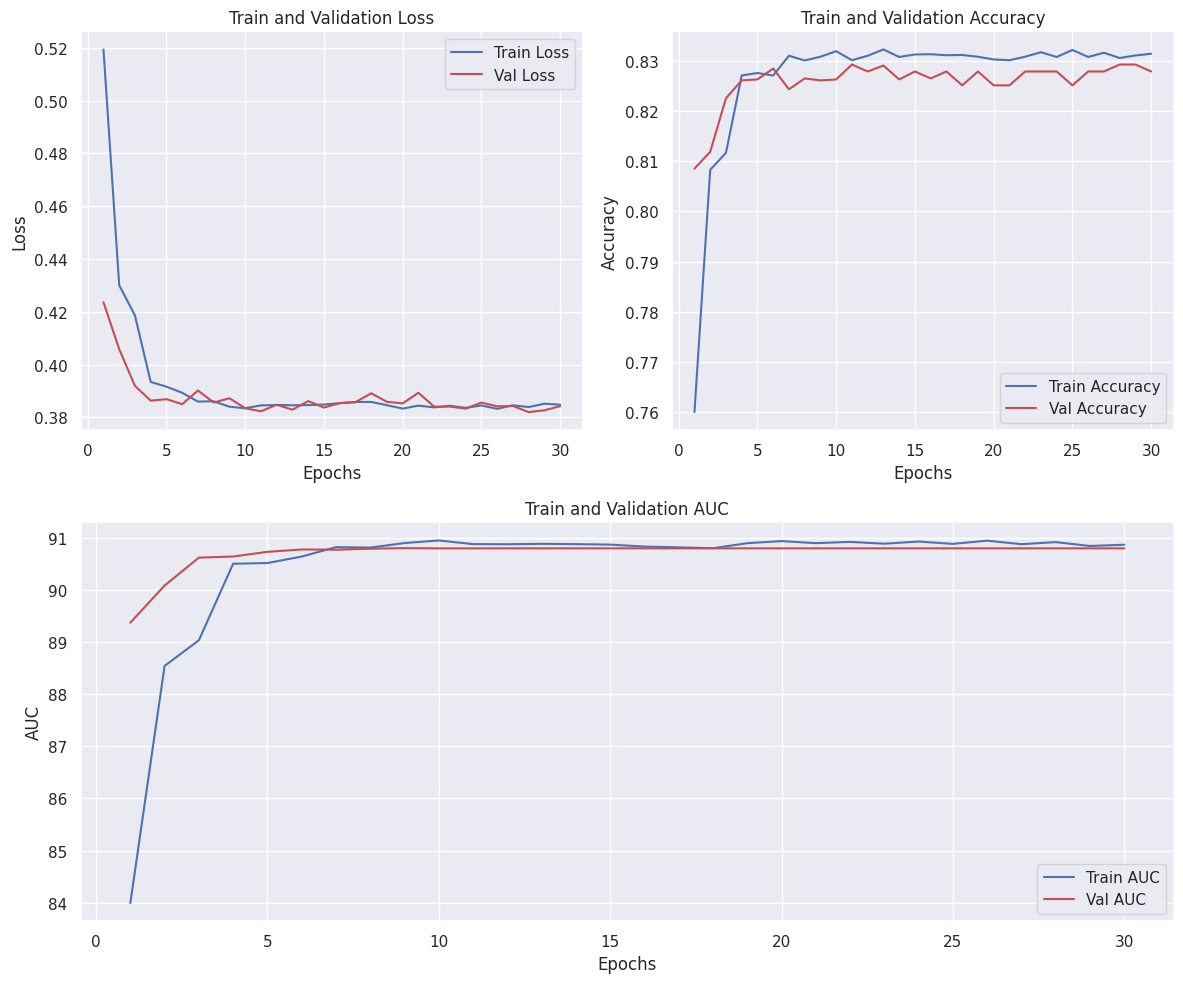

In [13]:
plot_metrics(train_loss, val_loss, train_acc, val_acc, train_auc, val_auc)